# 1 env set up

In [ ]:


from platform import python_version

print(python_version())

3.8.10


env python should be 3.8.10

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -O ./spark-3.3.1-bin-hadoop3.tgz  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar zxvf ./spark-3.3.1-bin-hadoop3.tgz
!pip install findspark

--2023-02-17 14:36:49--  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299350810 (285M) [application/x-gzip]
Saving to: ‘./spark-3.3.1-bin-hadoop3.tgz’

./spark-3.3.1-bin-h 100%[===================>] 285.48M   163MB/s    in 1.8s    

2023-02-17 14:36:51 (163 MB/s) - ‘./spark-3.3.1-bin-hadoop3.tgz’ saved [299350810/299350810]

spark-3.3.1-bin-hadoop3/
spark-3.3.1-bin-hadoop3/LICENSE
spark-3.3.1-bin-hadoop3/NOTICE
spark-3.3.1-bin-hadoop3/R/
spark-3.3.1-bin-hadoop3/R/lib/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.1-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3

In [ ]:
import os
import glob


os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"
os.environ["PYTHONHASHSEED"]=str(232)

In [ ]:
%pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import os

In [ ]:
import findspark
import random
findspark.init()

In [ ]:
!mkdir /root/.final_prj/

mkdir: cannot create directory ‘/root/.final_prj/’: File exists


In [ ]:

import pyspark
from pyspark.sql import functions as f


In [ ]:
import networkx as nx
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('DataBase').getOrCreate()

set up drive and data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# 2 Data incertion from drive

In [ ]:
#get main daily data from drive
sum_per_day=spark.read.csv("/content/drive/MyDrive/runi/BDP project/corona final project/geo_sum_0815.csv", sep=',', inferSchema=True, header=True)

In [ ]:
sum_per_day.show()

+---------+---------+--------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+
|town_code|agas_code|    town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|
+---------+---------+--------+-------------------+----------

In [ ]:
#get data of population (12) and city code(1) cordinates (19)
bycode2021=spark.read.csv("/content/drive/MyDrive/runi/BDP project/corona final project/bycode2021v2.csv", sep=',', inferSchema=True, header=True)

In [ ]:
bycode2021.show()

+-------------------+---------+------------+--------+-------+-------+-------+---------+------------------+--------------------+---------------+--------+---------------------+-------------+-----------+-------+---------+----------------+----------------+-------------+----------+----------+-----------+----+----------------+--------------------+------------------+------------------+
|           שם יישוב|סמל יישוב|       תעתיק|סמל מחוז|שם מחוז|סמל נפה| שם נפה|אזור טבעי|סמל מעמד מונציפאלי|   שם מעמד מונציפאלי|שיוך מטרופוליני|דת יישוב|סך הכל אוכלוסייה 2021|יהודים ואחרים|מזה: יהודים|  ערבים|שנת ייסוד|צורת יישוב שוטפת|השתייכות ארגונית|  קואורדינטות|גובה ממוצע|ועדת תכנון| תחנת משטרה| שנה|שם יישוב באנגלית|אשכול רשויות מקומיות|              long|               lat|
+-------------------+---------+------------+--------+-------+-------+-------+---------+------------------+--------------------+---------------+--------+---------------------+-------------+-----------+-------+---------+----------------+-

In [ ]:
# get the socio economical rank data by city
socio_rank_pop=spark.read.csv("/content/drive/MyDrive/runi/BDP project/corona final project/ LOCAL AUTHORITIES IN ASCENDING csv.csv", sep=',', inferSchema=True, header=True)

In [ ]:
socio_rank_pop.show()

+----------------+----------------+-------------+--------+------------------------+-------------------+-------------+----------------+-------------+----------------+--------------------------------------------+------------------------+
|municipal status|CODE OF LOCALITY|       hebrew|DISTRICT|INDEX POPULATION 2019[1]|INDEX VALUE 2019[2]|RANK 2019[3] |CLUSTER 2019[4] |RANK 2017[3] |CLUSTER 2017[4] |DIFFERENCE (CLUSTER 2019 MINUS CLUSTER 2017)|namme of local authurity|
+----------------+----------------+-------------+--------+------------------------+-------------------+-------------+----------------+-------------+----------------+--------------------------------------------+------------------------+
|              68|            null|    נווה מדבר|       6|                  12,261|             -2.844|            1|               1|            1|               1|                                           0|             NEVE MIDBAR|
|              99|            1192|   ערערה-בנגב|       

In [ ]:
# get the socio rank and sub city areas and population

sub_socio_rank_pop=spark.read.csv("/content/drive/MyDrive/runi/BDP project/corona final project/statistical area and ranking geo scocio.csv", sep=',', inferSchema=True, header=True)

In [ ]:
sub_socio_rank_pop.show()

+----------------+----------------+---------+----------------+------------------+-----------------+------------------------+------------------------+-------------------+-------------+-------------------+------------------+----+
|MUNICIPAL STATUS|CODE OF LOCALITY|  שם ישוב|NAME OF LOCALITY| CLUSTER 2019[4] 4| CLUSTER 2017[4]5|CODE OF STATISTICAL AREA|INDEX POPULATION 2019[1]|INDEX VALUE 2019[2]|RANK 2019[3] | CLUSTER 2019[4] 10| CLUSTER 2017[4]11|_c12|
+----------------+----------------+---------+----------------+------------------+-----------------+------------------------+------------------------+-------------------+-------------+-------------------+------------------+----+
|               0|              31|   אופקים|          OFAQIM|                 3|                3|                       6|                   6,123|             -1.723|          106|                  1|                 1|null|
|               0|              31|   אופקים|          OFAQIM|                 3|       

In [ ]:
hospitals=spark.read.csv("/content/drive/MyDrive/runi/BDP project/corona final project/hospitals.csv", sep=',', inferSchema=True, header=True)

In [ ]:
hospitals.show()

+--------------------+------------------+------------------+
|            Hospital|               lat|              long|
+--------------------+------------------+------------------+
|               Sheba|32.050921977198726|34.844090786162425|
|Mayanei HaYeshua ...|  32.0864161615671| 34.84426245097149|
|Tel Aviv Sourasky...| 32.08128939055867|34.789967430026174|
| Meir Medical Center| 32.18387390077495| 34.89661739992947|
|    Laniado Hospital| 32.35111303624267|34.856821755921324|
|Shamir Medical Ce...|31.966526142245904| 34.83956680094388|
|Wolfson Medical C...| 32.04678787793236| 34.75922747938785|
|  Ziv Medical Center| 33.00041909211144|35.501124136155596|
| Emek Medical Center|32.635722136875586| 35.31160997790102|
|Rambam Health Car...| 32.84422132671596|34.986140005806085|
|   Bnai Zion Medical| 32.81017864475674|  34.9930064608153|
|Hillel Yaffe Medi...| 32.45148499748091| 34.89577799724066|
|           bailinson| 32.09057665137987|34.867335370494494|
|Soroka Medical Ce...|31

# 3 data cleaning

# clean sub_socio_rank_pop




In [ ]:


temp = [1, 6,7,9]

# slice the column names from the DataFrame using the column indices
selected_columns = [sub_socio_rank_pop.columns[i] for i in temp]
print(selected_columns)

['CODE OF LOCALITY', 'CODE OF STATISTICAL AREA', 'INDEX POPULATION 2019[1]', 'RANK 2019[3] ']


In [ ]:
sub_socio_rank_pop = sub_socio_rank_pop.withColumnRenamed('CODE OF LOCALITY', "town_code")
sub_socio_rank_pop = sub_socio_rank_pop.withColumnRenamed("CODE OF STATISTICAL AREA", "agas_code")
sub_socio_rank_pop = sub_socio_rank_pop.withColumnRenamed("INDEX POPULATION 2019[1]", "pop_2019")
sub_socio_rank_pop = sub_socio_rank_pop.withColumnRenamed("RANK 2019[3] ", "socio_rank_2019")



In [ ]:
from pyspark.sql.functions import regexp_replace

# assuming the DataFrame is named "df" and the column with commas is named "my_col"
# remove commas from the "my_col" column
sub_socio_rank_pop = sub_socio_rank_pop.withColumn("pop_2019", regexp_replace("pop_2019", ",", ""))


# show the resulting DataFrame
sub_socio_rank_pop.show()


+----------------+---------+---------+----------------+------------------+-----------------+---------+--------+-------------------+---------------+-------------------+------------------+----+
|MUNICIPAL STATUS|town_code|  שם ישוב|NAME OF LOCALITY| CLUSTER 2019[4] 4| CLUSTER 2017[4]5|agas_code|pop_2019|INDEX VALUE 2019[2]|socio_rank_2019| CLUSTER 2019[4] 10| CLUSTER 2017[4]11|_c12|
+----------------+---------+---------+----------------+------------------+-----------------+---------+--------+-------------------+---------------+-------------------+------------------+----+
|               0|       31|   אופקים|          OFAQIM|                 3|                3|        6|    6123|             -1.723|            106|                  1|                 1|null|
|               0|       31|   אופקים|          OFAQIM|                 3|                3|        3|    3045|             -0.964|            254|                  3|                 3|null|
|               0|       31|   אופקים|  

# clean by_code

In [ ]:
temp=[1,11,17,19,26,27]


# slice the column names from the DataFrame using the column indices
selected_columns = [bycode2021.columns[i] for i in temp]
print(selected_columns)

['סמל יישוב', 'דת יישוב', 'צורת יישוב שוטפת', 'קואורדינטות', 'long', 'lat']


In [ ]:
bycode2021.columns

['שם יישוב',
 'סמל יישוב',
 'תעתיק',
 'סמל מחוז',
 'שם מחוז',
 'סמל נפה',
 'שם נפה',
 'אזור טבעי',
 'סמל מעמד מונציפאלי',
 'שם מעמד מונציפאלי',
 'שיוך מטרופוליני',
 'דת יישוב',
 'סך הכל אוכלוסייה 2021',
 'יהודים ואחרים',
 'מזה: יהודים',
 'ערבים',
 'שנת ייסוד',
 'צורת יישוב שוטפת',
 'השתייכות ארגונית',
 'קואורדינטות',
 'גובה ממוצע',
 'ועדת תכנון',
 'תחנת משטרה',
 'שנה',
 'שם יישוב באנגלית',
 'אשכול רשויות מקומיות',
 'long',
 'lat']

In [ ]:
bycode2021 = bycode2021.withColumnRenamed('סמל יישוב', "town_code")
bycode2021 = bycode2021.withColumnRenamed('דת יישוב', "relgion_code")
bycode2021 = bycode2021.withColumnRenamed('צורת יישוב שוטפת', "setelment_code")
bycode2021 = bycode2021.withColumnRenamed('קואורדינטות', 'geo_cordints')


# 4 data crunching

In [ ]:
df=sum_per_day

In [ ]:
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:

print(df.columns[4:19])

['accumulated_cases', 'new_cases_on_date', 'accumulated_recoveries', 'new_recoveries_on_date', 'accumulated_hospitalized', 'new_hospitalized_on_date', 'accumulated_deaths', 'new_deaths_on_date', 'accumulated_diagnostic_tests', 'new_diagnostic_tests_on_date', 'accumulated_vaccination_first_dose', 'new_vacc_first_dose_on_date', 'accumulated_vaccination_second_dose', 'new_vacc_second_dose_on_date', 'accumulated_vaccination_third_dose']


In [ ]:
df.show()

+---------+---------+--------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+
|town_code|agas_code|    town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|
+---------+---------+--------+-------------------+----------

In [ ]:
df.count()

1689768

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

df = df.withColumn("row_number", monotonically_increasing_id())


In [ ]:
df.show()

+---------+---------+--------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+
|town_code|agas_code|    town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|row_number|
+---------+---------+--------+--------

In [ ]:
from pyspark.sql.functions import col

df.filter(col("row_number").between(100,200)).show()

+---------+---------+--------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+
|town_code|agas_code|    town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|row_number|
+---------+---------+--------+--------

In [ ]:
print(df.count())

1689768


In [ ]:
from pyspark.sql.functions import max

# find the max date = last date
max_date = df.agg(max("date")).collect()[0][0]
print(max_date)

2022-12-25 00:00:00


In [ ]:
from pyspark.sql.functions import col, lit

# filter the data to the last date - this will find the acumulated sick people in each town and area
last_date_df = df.filter(col("date") == lit(max_date))

In [ ]:
last_date_df.count()

1659

In [ ]:
last_date_df.show()

+---------+---------+----------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+
|town_code|agas_code|      town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|row_number|
+---------+---------+----------+--

In [ ]:
from pyspark.sql.functions import sum, col


# create a filtered for "Ofakim" town and last date
town_code_date_df = last_date_df.filter(col("town_code") == "31")


In [ ]:
town_code_date_df.show()

+---------+---------+------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+
|town_code|agas_code|  town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|row_number|
+---------+---------+------+--------------

In [ ]:
#sum all the acumulated cases in ofakim sub areas
sum_df = town_code_date_df.agg(sum("accumulated_cases")).collect()
print(sum_df)


[Row(sum(accumulated_cases)=19496)]


In [ ]:
last_date_df.columns

['town_code',
 'agas_code',
 'town',
 'date',
 'accumulated_cases',
 'new_cases_on_date',
 'accumulated_recoveries',
 'new_recoveries_on_date',
 'accumulated_hospitalized',
 'new_hospitalized_on_date',
 'accumulated_deaths',
 'new_deaths_on_date',
 'accumulated_diagnostic_tests',
 'new_diagnostic_tests_on_date',
 'accumulated_vaccination_first_dose',
 'new_vacc_first_dose_on_date',
 'accumulated_vaccination_second_dose',
 'new_vacc_second_dose_on_date',
 'accumulated_vaccination_third_dose',
 'new_vacc_third_dose_on_date',
 'row_number']

In [ ]:
# join last_date_df and sub_socio_rank_pop based on town_code and agas_code
joined_df = last_date_df.join(sub_socio_rank_pop.select('town_code', 'agas_code', 'pop_2019', 'socio_rank_2019'), ["town_code", "agas_code"], "left")

# select the desired columns
#selected_df = joined_df.select("town_code", "agas_code", "pop_2019", "socio_rank_2019")


#new_df = joined_df.join(bycode2021.select("town_code", "some_col1", "some_col2", "some_col3"), ["town_code"], "left")


In [ ]:
joined_df.show()

+---------+---------+----------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+
|town_code|agas_code|      town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|row_number|pop_2019|s

In [ ]:
#add ['relgion_code', 'setelment_code', 'geo_cordints'] from by code 

# join last_date_df and bycode data based on town_code and agas_code
joined_df = joined_df.join(bycode2021.select('relgion_code', 'setelment_code', 'geo_cordints','town_code'), ["town_code"], "left")



In [ ]:
joined_df.show()

+---------+---------+----------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+------------+--------------+-------------+
|town_code|agas_code|      town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vac

In [ ]:
# filter out the rows with null values in the "pop_2019" and "socio_rank_2019" columns
filtered_df = joined_df.na.drop(subset=["pop_2019", "socio_rank_2019"])

# show the resulting DataFrame
filtered_df.show()

+---------+---------+------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+------------+--------------+-------------+
|town_code|agas_code|  town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_

In [ ]:
filtered_df.count()

1397

In [ ]:
# filter out the rows with null values in the "pop_2019" and "socio_rank_2019" columns
filtered_df2 = joined_df.na.drop(subset=[ "socio_rank_2019"])
filtered_df3 = filtered_df2.na.drop(subset=[ "pop_2019"])

# show the resulting DataFrame
#filtered_df2.show()

In [ ]:
filtered_df3.show()

+---------+---------+------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+------------+--------------+-------------+
|town_code|agas_code|  town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_

In [ ]:
filtered_df3.count()

1397

In [ ]:
from pyspark.sql.functions import sum

# sum the "pop_2019" column
pop_sum = filtered_df3.agg(sum("pop_2019")).collect()[0][0]

# print the result
print(pop_sum)

6294051.0


In [ ]:
# create a new column "per_acc" that contains the percentage of accumulated cases per population
filtered_df3 = filtered_df3.withColumn("per_acc", filtered_df3["accumulated_cases"] / filtered_df3["pop_2019"])

# show the resulting DataFrame
filtered_df3.show()

+---------+---------+------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+------------+--------------+-------------+-------------------+
|town_code|agas_code|  town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_

In [ ]:

# Select the relevant columns
selected_df = filtered_df3.select(col("per_acc"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("per_acc", "socio_rank_2019")

print(f"Correlation between per_acc and socio_rank_2019: {correlation}")

Correlation between per_acc and socio_rank_2019: 0.3518834224502849


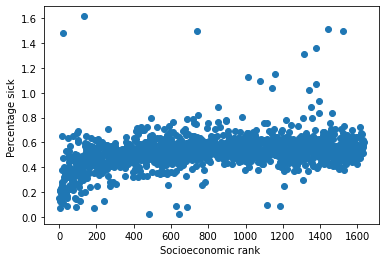

In [ ]:

import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Select the relevant columns
selected_df = filtered_df3.select("per_acc", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["per_acc"])

# Set the axis labels
plt.xlabel("Socioeconomic rank ")
plt.ylabel("Percentage sick ")

# Show the plot
plt.show()

In [ ]:

# Select the relevant columns
selected_df = filtered_df3.select(col("per_acc"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("per_acc", "socio_rank_2019")

print(f"Correlation between per_acc and socio_rank_2019: {correlation}")

Correlation between per_acc and socio_rank_2019: 0.3518834224502849


In [ ]:
# Save the DataFrame to a CSV file
#filtered_df3.write.mode("overwrite").option("header", "true").csv("/content/drive/MyDrive/runi/BDP project/corona final project/filtered_df3.csv")

In [ ]:
t_statistic

14.040731190099136

In [ ]:
from pyspark.sql.functions import col, corr, lit
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("per_acc"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("per_acc", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(float(t_statistic)), deg_f) * 2
#p_value = t.sf(abs(t_statistic), df) * 2
# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")

TypeError: ignored

In [ ]:
from pyspark.sql.functions import col, corr, lit
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("per_acc"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("per_acc", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(float(t_statistic)), deg_f) * 2

# Create a PySpark column from the p-value
p_value_col = lit(p_value)

# Show the results
result = spark.createDataFrame([(correlation, t_statistic, deg_f, p_value_col)], ["correlation", "t_statistic", "degrees_of_freedom", "p_value"])
result.show()

# corelation between scocoi economis and 2nd and 3rd vaccination

In [ ]:
import pyspark.sql.functions as F

# Create a new column for the percentage of the population that has received the second dose
filtered_df3 = filtered_df3.withColumn("vac2_per", F.col("accumulated_vaccination_second_dose") / F.col("pop_2019"))

# Create a new column for the percentage of the population that has received the third dose
filtered_df3 = filtered_df3.withColumn("vac3_per", F.col("accumulated_vaccination_third_dose") / F.col("pop_2019"))



In [ ]:
filtered_df3.show()

+---------+---------+------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+------------+--------------+-------------+-------------------+-------------------+-------------------+
|town_code|agas_code|  town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dos

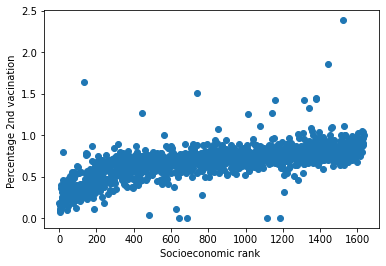

In [ ]:
# Select the relevant columns
selected_df = filtered_df3.select("vac2_per", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["vac2_per"])

# Set the axis labels
plt.xlabel("Socioeconomic rank ")
plt.ylabel("Percentage 2nd vacination ")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("vac2_per"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("vac2_per", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


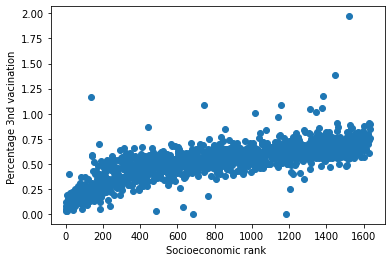

In [ ]:
# Select the relevant columns
selected_df = filtered_df3.select("vac3_per", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["vac3_per"])

# Set the axis labels
plt.xlabel("Socioeconomic rank ")
plt.ylabel("Percentage 3nd vacination ")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("vac3_per"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("vac3_per", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


In [ ]:
filtered_df3.show()

# mortality and scocial economuc corelation

In [ ]:
import pyspark.sql.functions as F

# Filter out rows with accumulated_deaths less than 15
filtered_df4 = filtered_df3.filter(F.col("accumulated_deaths") >= 6)

# Create a new column for the percentage of the mortality in population 
filtered_df4 = filtered_df4.withColumn("mortal_per", F.col("accumulated_deaths") / F.col("pop_2019"))



In [ ]:
print(filtered_df4.count())

65


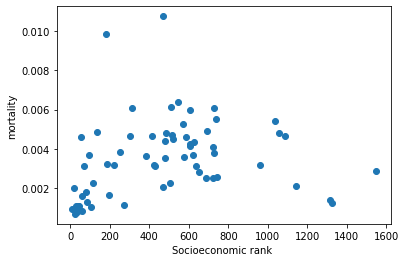

In [ ]:
# Select the relevant columns
selected_df = filtered_df4.select("mortal_per", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["mortal_per"])

# Set the axis labels
plt.xlabel("Socioeconomic rank ")
plt.ylabel("mortality")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df4.select(col("mortal_per"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("mortal_per", "socio_rank_2019")
print(correlation)

-0.023905778458343005


In [ ]:
#uth : 1 mortality is not corelated look at city clusters and scocial rank of 257 point and not 1344 point data in bycode
#2 look at testing rate
#3look at distance
# fix p value in vacination


#distance from hospital

In [ ]:
from pyspark.sql.functions import radians, asin, sin, cos, sqrt

# Define the Haversine formula as a UDF
#udf("double")
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

# Load the data into a PySpark DataFrame
data = spark.createDataFrame([(40.7128, -74.0060), (51.5074, -0.1278), (45.0000,34.9999),(22.9999,33.7777),(48.8566, 2.3522)], ["lat", "long"])

# Create a DataFrame with the other coordinates
others = spark.createDataFrame([(37.7749, -122.4194),(32.0000, 35.000), (35.6895, 139.6917), (55.7558, 37.6173)], ["other_lat", "other_long"])

# Add a cross join to create all possible pairs of coordinates
pairs = data.crossJoin(others)

# Calculate the distance between each pair using the Haversine formula
distances = pairs.select(
    "lat", "long", "other_lat", "other_long",
    haversine("lat", "long", "other_lat", "other_long").alias("distance")
)

# Sort by distance and take the top 3 shortest distances
shortest_distances = distances.orderBy("distance").limit(3)

# Show the results
shortest_distances.show()


In [ ]:
# show the distinct distances from col 1
shortest_distances = distances.orderBy("distance")

shortest_distances.select("lat", "long").distinct().show()

In [ ]:
pairs.show()

In [ ]:
shortest_distances.show()

In [ ]:
distances.show()

In [ ]:
# Load the data into a PySpark DataFrame
data = spark.createDataFrame([(1, "John","a"), (2, "Jane","b"), (3, "Bob","c"), (2, "Jane","d")], ["id", "name","leteer"])
 
# Show the unique values in the "id" column
data.select("id").distinct().show()

# Show the unique values in the "id" and "name" columns
data.select("id", "name").distinct().show()